In [1]:
import numpy as np
import pandas as pd


In [2]:
data = pd.read_csv("uber.csv")

In [3]:
print(data.shape)
print(data.columns)

(200000, 9)
Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')


In [4]:
data.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
# returns dataframe containing only
#features (independent variables) of dataset
#select all rows, and coloumn except last onr
data_x = data.iloc[:,0:-1].values

# select al rows bu tonly last col, i.e target variable
data_y = data.iloc[:,-1].values
print(data_x)
print(data_y)

[[24238194 '2015-05-07 19:52:06.0000003' 7.5 ... 40.73835372924805
  -73.99951171875 40.72321701049805]
 [27835199 '2009-07-17 20:04:56.0000002' 7.7 ... 40.728225 -73.99471
  40.750325]
 [44984355 '2009-08-24 21:45:00.00000061' 12.9 ... 40.74077 -73.962565
  40.772647]
 ...
 [27804658 '2009-06-29 00:42:00.00000078' 30.9 ... 40.756487
  -73.85895699999999 40.692588]
 [20259894 '2015-05-20 14:56:25.0000004' 14.5 ... 40.7254524230957
  -73.98321533203125 40.69541549682617]
 [11951496 '2010-05-15 04:08:00.00000076' 14.1 ... 40.720077 -73.985508
  40.768793]]
[1 1 1 ... 2 1 1]


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [7]:
#converting col into datetime format
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

In [8]:
data.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [9]:
data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


Removing negative fare value & optimising passenger value max upto 7 people

In [10]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [11]:
data.dropna(inplace=True) # dropping the null values
print(data.isnull().sum())

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\yashs\AppData\Local\Temp\ipykernel_20472\3826939893.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['fare_amount'])
C:\Users\yashs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fare_amount', ylabel='Density'>

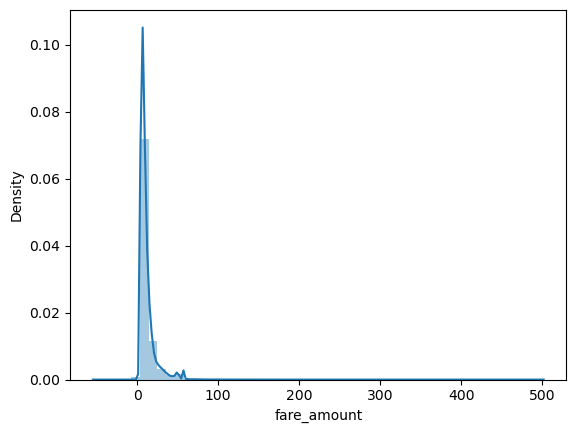

In [13]:
sns.distplot(data['fare_amount'])

In distribution plot aslo it can be seen that there are some values which are negative fare

C:\Users\yashs\AppData\Local\Temp\ipykernel_20472\3863413107.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['pickup_latitude'])
C:\Users\yashs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='pickup_latitude', ylabel='Density'>

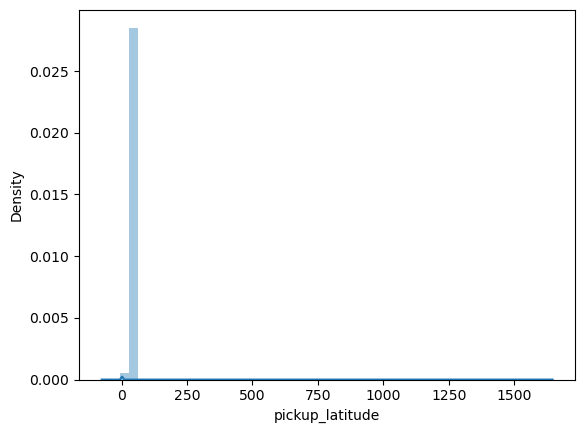

In [14]:
sns.distplot(data['pickup_latitude'])

Here we can see minim value is going to be less than even -3000 whichis not correct value and also on positive side also going more than 2000

C:\Users\yashs\AppData\Local\Temp\ipykernel_20472\4167471858.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['pickup_longitude'])
C:\Users\yashs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='pickup_longitude', ylabel='Density'>

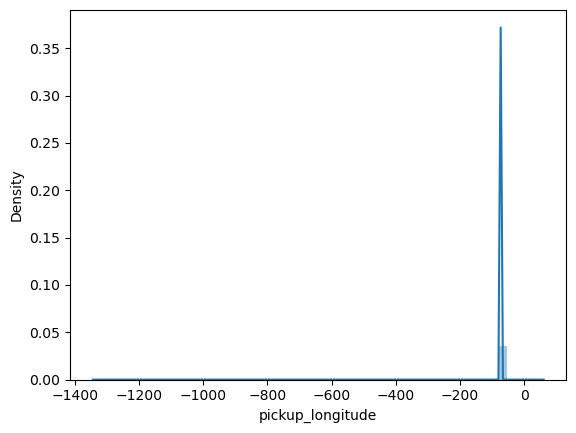

In [15]:
sns.distplot(data['pickup_longitude'])

C:\Users\yashs\AppData\Local\Temp\ipykernel_20472\1920193562.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['dropoff_latitude'])
C:\Users\yashs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='dropoff_latitude', ylabel='Density'>

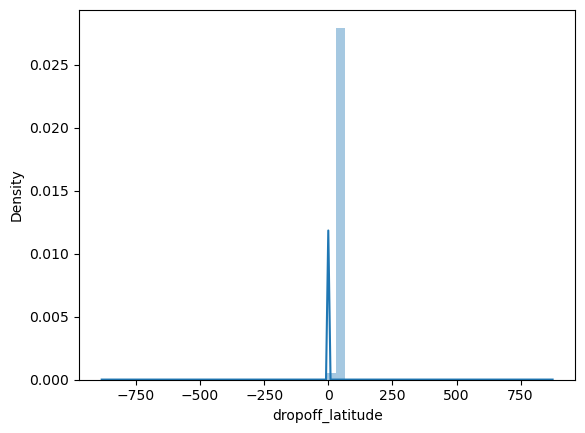

In [16]:
sns.distplot(data['dropoff_latitude'])

C:\Users\yashs\AppData\Local\Temp\ipykernel_20472\1035082461.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['dropoff_longitude'])
C:\Users\yashs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='dropoff_longitude', ylabel='Density'>

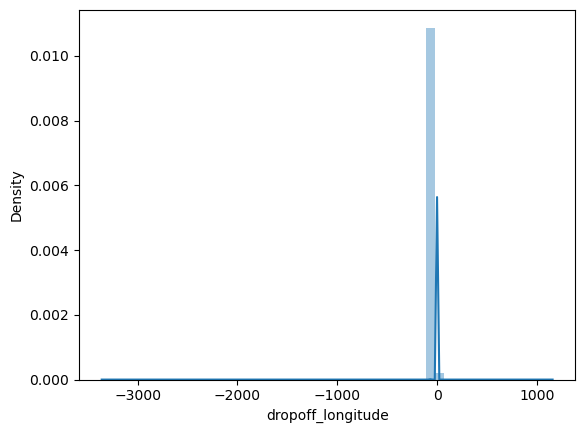

In [17]:
sns.distplot(data['dropoff_longitude'])

In [18]:
print("dropoff_off latitude min value", data['dropoff_latitude'].min())
print("dropoff_off latitude max value", data['dropoff_latitude'].max())
print("dropoff_off longitude min value", data['dropoff_longitude'].min())
print("dropoff_off longitude max value", data['dropoff_longitude'].max())

print("pickup_off latitude min value", data['pickup_latitude'].min())
print("pickup_off latitude max value", data['pickup_latitude'].max())
print("pickup_off longitude min value", data['pickup_longitude'].min())
print("pickup_off longitude max value", data['pickup_longitude'].max())

dropoff_off latitude min value -881.9855130000001
dropoff_off latitude max value 872.6976279999999
dropoff_off longitude min value -3356.6663
dropoff_off longitude max value 1153.5726029999998
pickup_off latitude min value -74.01551500000001
pickup_off latitude max value 1644.421482
pickup_off longitude min value -1340.64841
pickup_off longitude max value 57.418457


In [19]:
# set same range in train set so that noisy data is removed
min_longitude = -74.263242
min_latitude = 40.573143
max_longitude = -72.986532
max_latitude = 41.709555

In [20]:
# drop all the values which are not cmoing in above range, as those are noisy data

In [21]:
tempdf=data[(data["dropoff_latitude"]<min_latitude) | (data["pickup_latitude"]<min_latitude) | (data["dropoff_longitude"]<min_longitude) | (data["pickup_longitude"]<min_longitude) | (data["dropoff_latitude"]>max_latitude) | (data["pickup_latitude"]>max_latitude) | (data["dropoff_longitude"]>max_longitude) | (data["pickup_longitude"]>max_longitude) ]
print("before droppping", data.shape)
data.drop(tempdf.index, inplace=True)
print("after dropping", data.shape)

before droppping (199999, 9)
after dropping (195732, 9)


In [22]:
# remove all rows whose fare is negative
print("before droppping", data.shape)
train_df = data[data['fare_amount']>0]
print('after_droppping', data.shape)

before droppping (195732, 9)
after_droppping (195732, 9)


On different day and time there would be different price like during eveing price would be more compare to afternoon, during christmas price would be different and similarly on weekends price would be different compare to week days. so lets create some extra features which will take care of all these things

In [23]:
import calendar
data['day']=data['pickup_datetime'].apply(lambda x:x.day) #extracts day component
data['hour']=data['pickup_datetime'].apply(lambda x:x.hour) #gives hour part of the datetime
data['weekday']=data['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()]) #returns day of the week as an integer(0-6)
data['month']=data['pickup_datetime'].apply(lambda x:x.month) # gives month component
data['year']=data['pickup_datetime'].apply(lambda x:x.year) # gives year component

In [24]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,7,19,Thursday,5,2015
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,17,20,Friday,7,2009
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,24,21,Monday,8,2009
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,26,8,Friday,6,2009
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,28,17,Thursday,8,2014


In [25]:
# converting week day into numercial form

In [26]:
data.weekday = data.weekday.map({'Sunday':0,'Monday': 1, 'Tuesday': 2,'Wednesday': 3,'Thursday': 4,'Friday': 5,'Saturday': 6})

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195732 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         195732 non-null  int64              
 1   key                195732 non-null  object             
 2   fare_amount        195732 non-null  float64            
 3   pickup_datetime    195732 non-null  datetime64[ns, UTC]
 4   pickup_longitude   195732 non-null  float64            
 5   pickup_latitude    195732 non-null  float64            
 6   dropoff_longitude  195732 non-null  float64            
 7   dropoff_latitude   195732 non-null  float64            
 8   passenger_count    195732 non-null  int64              
 9   day                195732 non-null  int64              
 10  hour               195732 non-null  int64              
 11  weekday            195732 non-null  int64              
 12  month              195732 non-null 

In [28]:
# we will keep only those rows where number of passengers are less than 8

In [29]:
data = data[data['passenger_count']<=8]

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195731 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         195731 non-null  int64              
 1   key                195731 non-null  object             
 2   fare_amount        195731 non-null  float64            
 3   pickup_datetime    195731 non-null  datetime64[ns, UTC]
 4   pickup_longitude   195731 non-null  float64            
 5   pickup_latitude    195731 non-null  float64            
 6   dropoff_longitude  195731 non-null  float64            
 7   dropoff_latitude   195731 non-null  float64            
 8   passenger_count    195731 non-null  int64              
 9   day                195731 non-null  int64              
 10  hour               195731 non-null  int64              
 11  weekday            195731 non-null  int64              
 12  month              195731 non-null 

In [31]:
#here key column and pickup_datetime columns are not needed as we have already created variables extracted from it

In [32]:
data.drop(["key","pickup_datetime"], axis=1, inplace=True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195731 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         195731 non-null  int64  
 1   fare_amount        195731 non-null  float64
 2   pickup_longitude   195731 non-null  float64
 3   pickup_latitude    195731 non-null  float64
 4   dropoff_longitude  195731 non-null  float64
 5   dropoff_latitude   195731 non-null  float64
 6   passenger_count    195731 non-null  int64  
 7   day                195731 non-null  int64  
 8   hour               195731 non-null  int64  
 9   weekday            195731 non-null  int64  
 10  month              195731 non-null  int64  
 11  year               195731 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 19.4 MB


In [34]:
#splitting into train and validation test set
from sklearn.model_selection import train_test_split

In [35]:
x = data.drop('fare_amount', axis = 1)

In [36]:
y = data['fare_amount']

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 101)

In [38]:
x_train.head()

,Unnamed: 0,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
7570,51992033,-73.991973,40.742657,-73.991358,40.750086,1,31,22,1,10,2011
155037,10241908,-73.964111,40.807957,-73.966688,40.803299,1,18,14,3,6,2014
67010,48963133,-73.987658,40.700823,-73.985670,40.770540,1,2,22,0,2,2014
155236,30446807,-73.999577,40.726656,-74.007562,40.713286,1,29,18,3,5,2013
187226,40739497,-73.983377,40.738938,-73.978432,40.745286,1,12,2,6,6,2010


In [39]:
x_test.head()

,Unnamed: 0,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
51869,5536882,-73.953347,40.767932,-73.990867,40.751295,5,8,17,0,11,2009
44724,35054768,-73.137393,41.366138,-73.137393,41.366138,2,11,20,0,7,2010
47705,15258057,-74.009707,40.712480,-73.962757,40.758977,1,3,21,0,7,2011
17345,34739111,-74.016055,40.715077,-74.008840,40.711375,3,4,6,5,1,2013
179351,53446498,-73.950474,40.784003,-73.971086,40.748328,1,18,22,0,9,2011


In [40]:
x_train.shape

(156584, 11)

as we have to build regression model, lets strat with linear regression

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [43]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)

LinearRegression(n_jobs=1)

In [44]:
predictedvalues = model.predict(x_test)

In [45]:
#lets calculate rmse for linear Regression model
from sklearn.metrics import mean_squared_error
lrmodelrmse = np.sqrt(mean_squared_error(predictedvalues, y_test))
print("RMSE value for Linear regression is", lrmodelrmse)

RMSE value for Linear regression is 8.36301985939648


In [46]:
#Lets see with Random Forest and calculate its rmse
from sklearn.ensemble import RandomForestRegressor
# rfrmodel = RandomForestRegressor(n_estimators=100, random_state=101)
rfrmodel = RandomForestRegressor(n_estimators=50, random_state=101)

In [47]:
rfrmodel.fit(x_train,y_train)

RandomForestRegressor(n_estimators=50, random_state=101)

In [48]:
rfrmodel_pred= rfrmodel.predict(x_test)

In [49]:
rfrmodel_rmse=np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("RMSE value for Random forest regression is ",rfrmodel_rmse)

RMSE value for Random forest regression is  3.9973617568779463


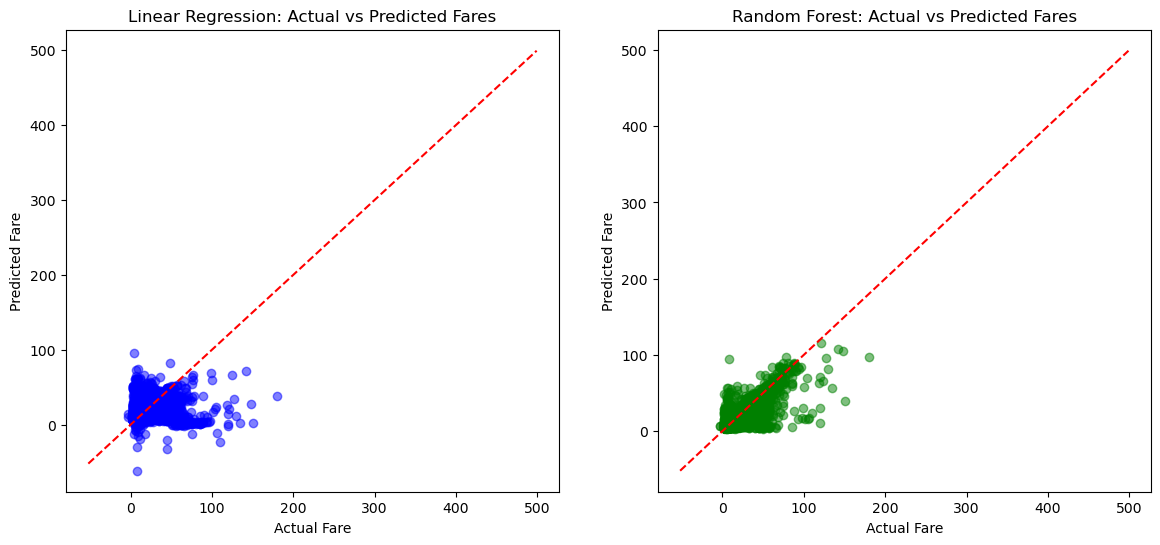

In [50]:
# Visualization of predicted vs actual fare amount for both models
plt.figure(figsize=(14, 6))

# Linear Regression Predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictedvalues, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Linear Regression: Actual vs Predicted Fares")

# Random Forest Predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, rfrmodel_pred, alpha=0.5, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Random Forest: Actual vs Predicted Fares")

plt.show()

In [51]:
solution = data.copy()
solution["LinerPred"]=model.predict(data.drop('fare_amount', axis=1))
solution["RandomForestPred"]=rfrmodel.predict(data.drop('fare_amount', axis=1))

In [57]:
solution[["fare_amount", "LinerPred", "RandomForestPred"]].head(10)


,fare_amount,LinerPred,RandomForestPred
0,7.5,11.543857,7.6700
1,7.7,8.196386,8.1520
2,12.9,7.454499,12.7040
3,5.3,5.182212,6.1760
4,16.0,17.363349,16.0266
5,4.9,10.783791,5.6260
6,24.5,23.033342,25.4858
8,9.7,10.078892,9.4780
9,12.5,8.852346,12.4840
10,6.5,13.564322,8.6300


In [56]:
solution[["fare_amount", "LinerPred", "RandomForestPred"]].tail(10)

,fare_amount,LinerPred,RandomForestPred
199990,12.0,12.789957,12.5700
199991,17.5,12.780607,17.6700
199992,8.9,11.899700,8.7880
199993,9.5,12.319762,9.0060
199994,12.0,10.734976,10.2100
199995,3.0,11.509386,3.6840
199996,7.5,11.188290,7.8600
199997,30.9,18.385157,29.9886
199998,14.5,15.080484,13.8200
199999,14.1,9.786322,14.5860
